In [1]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# 读取数据
!ls data/

df_train = pd.read_csv("data\\first_round_training_data.csv")

# 去掉多余的特征
df_train = df_train.drop(df_train.columns[[10,11,12,13,14,15,16,17,18,19,]], axis=1, )

# 特征10 换位到最后一列
df_test = pd.read_csv("data\\first_round_testing_data.csv")
tmp = df_test["Parameter10"].copy()
df_test.drop("Parameter10",axis=1, inplace=True)
df_test["Parameter10"] = tmp

first_round_testing_data.csv
first_round_training_data.csv


In [3]:
df_train.head()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,Pass
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,Fail
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,Fail


In [4]:
# 制作标签
def makeLabel(row):
    #print(row)
    if row["Quality_label"] == "Fail":
        return 0
    elif row["Quality_label"] == "Pass":
        return 1
    elif row["Quality_label"] == "Good":
        return 2
    elif row["Quality_label"] == "Excellent":
        return 3

df_train["Quality_label"] = df_train.apply(makeLabel, axis=1)   
df_train.head()


,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Quality_label
0,0.001660,0.591013,147.608373,38.186345,0.000421,0.000612,2286.523413,0.035407,0.593081,1.010385,1
1,1.601749,0.015052,0.035864,51.130326,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0
2,0.098039,69.233685,0.080920,0.112265,0.000909,0.001972,2286.523413,0.035407,0.593081,1.010385,0
3,18.181860,0.047325,0.018061,1.098102,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0
4,0.012085,0.008749,0.005509,524.327396,0.000909,0.002397,2286.523413,0.035407,0.593081,1.010385,0


In [5]:
def score(res, target):
    if len(res) != len(target):
        raise Exception("数据错误")
    
    trueNum = 0
    for i in range(len(res)):
        if res[i] == y_train.iloc[i]:
            trueNum += 1
    print(float(trueNum/len(res)))

In [6]:
# 划分数据集
df_target = df_train["Quality_label"]
train = df_train.drop(["Quality_label"], axis=1)


X_train,X_test, y_train, y_test = train_test_split(train,df_target,test_size=0.3, random_state=0)


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

#对数据的训练集进行标准化

x = X_train.copy()
ss = StandardScaler()
X= ss.fit_transform(x)


## model -1 逻辑回归
# clf = LogisticRegression(random_state=2, solver='lbfgs',multi_class='multinomial',max_iter = 1000).fit(X, y_train)
# print(clf.score(X,y_train))


### model -2  决策树  score 0.50

# from sklearn.tree import DecisionTreeClassifier

# treeClf = DecisionTreeClassifier(
#                                      max_depth=7
#                                    # ,splitter = "random"
#                                     ,min_samples_split = 40
#                                     ,random_state = 6
    
#                                         )
# treeClf = treeClf.fit(X_train, y_train)
# res = treeClf.score(X_test,y_test)
# print(res)

### model-3  随机森林
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
                          n_estimators=100  # 默认10，决策树的数量, 越多越好，从100开始。
                          
                        , bootstrap=True   # 有放回采样
                        , oob_score=False  # out-of-bag 使用没有抽到的数据做验证
                        , n_jobs=None      #并行计算
                        , verbose=0        # 打印训练日志
                        , warm_start=False  # 热启动
                        
                        #与决策树相关的参数
                        , criterion='gini'  # 或 "entropy" 
                        , random_state=None
                        , class_weight=None
                        , max_depth=None
                        , min_samples_split=2
                        , min_samples_leaf=1
                        , min_weight_fraction_leaf=0.0
                        , max_features='auto' # auto=特征数的开根号，log2=log2(n_features)， None = n_features
                        , max_leaf_nodes=None
                        , min_impurity_decrease=0.0
                        , min_impurity_split=None
                        )

rfc = rfc.fit(X_train, y_train)
score = rfc.score(X_test,y_test)
print(score)

0.5022222222222222


best n_estimators:  126
best score: 0.5088888888888888


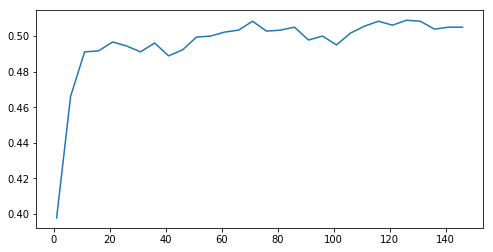

In [7]:
### 调参过程

# step1：n_estimators 粗调

score_list = []
for c in range(1,150,5):
    rfc = RandomForestClassifier(
                              n_estimators=c # 默认10，决策树的数量, 越多越好，从100开始。

                            , bootstrap=True   # 有放回采样
                            , oob_score=False  # out-of-bag 使用没有抽到的数据做验证
                            , n_jobs=None      #并行计算
                            , verbose=0        # 打印训练日志
                            , warm_start=False  # 热启动

                            #与决策树相关的参数
                            , criterion='gini'  # 或 "entropy" 
                            , random_state=1
                            , class_weight=None
                            , max_depth=None
                            , min_samples_split=2
                            , min_samples_leaf=1
                            , min_weight_fraction_leaf=0.0
                            , max_features="auto" # auto=特征数的开根号，log2=log2(n_features)， None = n_features
                            , max_leaf_nodes=None
                            , min_impurity_decrease=0.0
                            , min_impurity_split=None
                            )

    rfc = rfc.fit(X_train, y_train)
    score = rfc.score(X_test,y_test)
    score_list.append(score)
print("best n_estimators: ", range(1,150,5)[score_list.index(max(score_list))])
print("best score:", max(score_list))
plt.figure(figsize=[8,4])
plt.plot(range(1,150,5),score_list)

best n_estimators:  115
best score: 0.5094444444444445


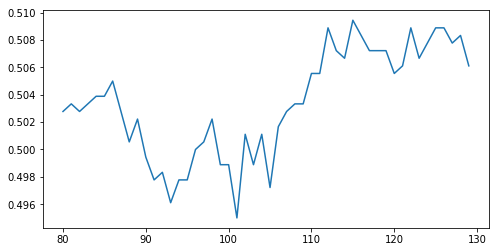

In [8]:
# n_estimators 精调
score_list = []
for c in range(80,130,1):
    rfc = RandomForestClassifier(
                              n_estimators=c # 默认10，决策树的数量, 越多越好，从100开始。

                            , bootstrap=True   # 有放回采样
                            , oob_score=False  # out-of-bag 使用没有抽到的数据做验证
                            , n_jobs=None      #并行计算
                            , verbose=0        # 打印训练日志
                            , warm_start=False  # 热启动

                            #与决策树相关的参数
                            , criterion='gini'  # 或 "entropy" 
                            , random_state=1
                            , class_weight=None
                            , max_depth=None
                            , min_samples_split=2
                            , min_samples_leaf=1
                            , min_weight_fraction_leaf=0.0
                            , max_features="auto" # auto=特征数的开根号，log2=log2(n_features)， None = n_features
                            , max_leaf_nodes=None
                            , min_impurity_decrease=0.0
                            , min_impurity_split=None
                            )

    rfc = rfc.fit(X_train, y_train)
    score = rfc.score(X_test,y_test)
    score_list.append(score)
print("best n_estimators: ", range(80,130,1)[score_list.index(max(score_list))])
print("best score:", max(score_list))
plt.figure(figsize=[8,4])
plt.plot(range(80,130,1),score_list)


## 最佳 115

best max_depth:  8
best score: 0.5233333333333333


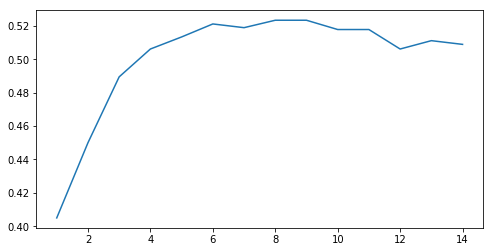

In [9]:

# step2：max_depth 精调
score_list = []

for c in range(1,15,1):
    rfc = RandomForestClassifier(
                              n_estimators=115 # 默认10，决策树的数量, 越多越好，从100开始。

                            , bootstrap=True   # 有放回采样
                            , oob_score=False  # out-of-bag 使用没有抽到的数据做验证
                            , n_jobs=None      #并行计算
                            , verbose=0        # 打印训练日志
                            , warm_start=False  # 热启动

                            #与决策树相关的参数
                            , criterion='gini'  # 或 "entropy" 
                            , random_state=1
                            , class_weight=None
                            , max_depth=c
                            , min_samples_split=2
                            , min_samples_leaf=1
                            , min_weight_fraction_leaf=0.0
                            , max_features="auto" # auto=特征数的开根号，log2=log2(n_features)， None = n_features
                            , max_leaf_nodes=None
                            , min_impurity_decrease=0.0
                            , min_impurity_split=None
                            )

    rfc = rfc.fit(X_train, y_train)
    score = rfc.score(X_test,y_test)
    score_list.append(score)
print("best max_depth: ", range(1,15,1)[score_list.index(max(score_list))])
print("best score:", max(score_list))
plt.figure(figsize=[8,4])
plt.plot(range(1,15,1),score_list)

# 最佳是8

In [10]:

# step3：min_samples_leaf 精调

from sklearn.model_selection import GridSearchCV
 
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
 

rfc = RandomForestClassifier(
                             n_estimators=115
                            ,random_state=1
                            ,max_depth = 8
                            )
GS = GridSearchCV(rfc, param_grid, cv=10) 
GS.fit(train,df_target)

print(GS.best_params_)
 
print(GS.best_score_)

# 最佳是9

{'min_samples_leaf': 2}
0.49316666666666664


In [11]:
rfc = RandomForestClassifier(
                          n_estimators=115 # 默认10，决策树的数量, 越多越好，从100开始。

                        , bootstrap=True   # 有放回采样
                        , oob_score=False  # out-of-bag 使用没有抽到的数据做验证
                        , n_jobs=None      #并行计算
                        , verbose=0        # 打印训练日志
                        , warm_start=False  # 热启动

                        #与决策树相关的参数
                        , criterion='gini'  # 或 "entropy" 
                        , random_state=1
                        , class_weight=None
                        , max_depth=8
                        , min_samples_split=2
                        , min_samples_leaf=1
                        , min_weight_fraction_leaf=0.0
                        , max_features="auto" # auto=特征数的开根号，log2=log2(n_features)， None = n_features
                        , max_leaf_nodes=None
                        , min_impurity_decrease=0.0
                        , min_impurity_split=None
                        )

rfc = rfc.fit(train, df_target)

In [12]:
# 测试集
testRes = rfc.predict(df_test.iloc[:,1:])

In [13]:
# 类别结果加到原始的测试集
df_test = pd.concat([df_test, pd.DataFrame(data=testRes)], axis=1,)

In [14]:
df_test.head()

,Group,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,0
0,0,0.235279,0.351488,0.186814,0.086456,1.434060,1.230409,0.038483,2.931083,2.005852,0.195680,3
1,0,0.043799,32.590688,0.886285,29.702490,0.027434,0.016852,0.600827,0.118077,887.611257,0.523976,0
2,0,21.466737,11.847792,79499.554454,13544.605343,0.027434,0.016852,0.600827,0.118077,887.611257,0.523976,0
3,0,0.703795,0.018080,317.015599,38.087562,0.428092,0.314162,0.038483,17.850021,0.051850,0.010192,2
4,0,10.447960,15.983891,0.996049,16.715690,0.477823,0.464037,0.038483,17.850021,0.051850,0.010192,2


In [15]:
submit_csv = pd.read_csv("submit_example.csv")
submit_csv.head()

,Group,Excellent ratio,Good ratio,Pass ratio,Fail ratio
0,0,0.4,0.2,0.2,0.2
1,1,0.4,0.2,0.2,0.2
2,2,0.4,0.2,0.2,0.2
3,3,0.4,0.2,0.2,0.2
4,4,0.4,0.2,0.2,0.2


In [16]:
# 分组计算 概率
g = df_test.groupby("Group")
group_list = df_test.Group.unique()

for i in group_list:
    tmp = g.get_group(i)
    Excellent = len(tmp[tmp[0]==3])/50.0
    Good = len(tmp[tmp[0]==2])/50.0
    Pass = len(tmp[tmp[0]==1])/50.0
    Fail = len(tmp[tmp[0]==0])/50.0
    submit_csv[submit_csv["Group"]==i] = [i, Excellent, Good, Pass, Fail]

In [17]:
submit_csv.head()

,Group,Excellent ratio,Good ratio,Pass ratio,Fail ratio
0,0,0.10,0.56,0.20,0.14
1,1,0.08,0.40,0.40,0.12
2,2,0.22,0.52,0.24,0.02
3,3,0.24,0.36,0.38,0.02
4,4,0.04,0.62,0.24,0.10


In [18]:

submit_csv.to_csv('./result.csv', index=False, header=True)